In [20]:
import matplotlib.pyplot as plt
import sys
from PIL import Image
import numpy as np
sys.setrecursionlimit(50000)
%matplotlib inline

In [21]:
black_pixel = 0
white_pixel = 255
border = 10
def read_img(filename):
    im=Image.open(filename)
    return im
    
def to_matrix(img):
    img = img.convert('L')
    bw = np.asarray(img).copy()
    return bw
    #bwf = bw.flatten();
    
def normalize_matrix(X):
    for  i in range(len(X)):
        for j in range(len(X[i])):
            if(X[i][j] > border):
                X[i][j] = white_pixel
            else:
                X[i][j] = black_pixel

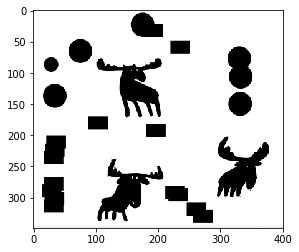

In [22]:
filename = "moose.png"
img = read_img(filename)
X = to_matrix(img)
plt.imshow(img,cmap='gray')
plt.show()

In [23]:
print(X)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [228 238 238 ... 238 238 238]
 [195 190 190 ... 190 190 190]
 [239 239 239 ... 240 240 240]]


In [24]:
normalize_matrix(X)
print(X)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


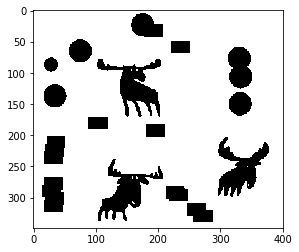

In [25]:
plt.imshow(X,cmap='gray')
plt.show()

In [26]:
def extract_pictures(X):
    Map = [[False for i in range(len(X[0]))] for j in range(len(X))]
    pictures = []
    for i in range(len(X)):
        for j in range(len(X[i])):
            if(X[i][j] == black_pixel and Map[i][j] == False):
                tuples = []
                flood_fill_extraction(Map, X , i ,j ,tuples)
                if(len(tuples) > 1):
                    picture = extract_picture(X, tuples)
                    if(len(picture) > 1):
                        pictures.append(picture)
            else:
                Map[i][j] = True
    return pictures
                
def flood_fill_extraction(Map,X,x,y,tuples):
    if(X[x][y] == black_pixel and valid_point(X,x,y) and Map[x][y] == False):
        tuples.append((x,y))
        Map[x][y] = True
        flood_fill_extraction(Map ,X , x+1,y, tuples)
        flood_fill_extraction(Map ,X , x-1,y, tuples)
        flood_fill_extraction(Map ,X ,x, y+1, tuples)
        flood_fill_extraction(Map ,X ,x, y-1, tuples)

def valid_point(M,x,y):
    return x in range(len(M)) and y in range(len(M[x]))

def extract_picture(X,tuples):
    picture = []
    min_x = 100000000000
    min_y = 100000000000
    max_x = 0
    max_y = 0
    for tup in tuples:
        if(tup[0] < min_x):
            min_x = tup[0]
        if(tup[0] > max_x):
            max_x = tup[0]
        if(tup[1] < min_y):
            min_y = tup[1]
        if(tup[1] > max_y):
            max_y = tup[1]
    
    for i in range(min_x,max_x):
        temp = []
        for j in range(min_y,max_y):
            temp.append(X[i][j])
        picture.append(temp)
    return picture
        
            
    
def filter_invalid_picures(pictures):
    count = 0
    filtered = []
    for picture in pictures:
        try:
            plt.imshow(picture,cmap='gray')
            filtered.append(picture)
        except TypeError:
            filtered
            filtered = filtered[:-1]
            count = count + 1
    print("{} invalid  pictures found".format(count))
    return filtered
                

0 invalid  pictures found


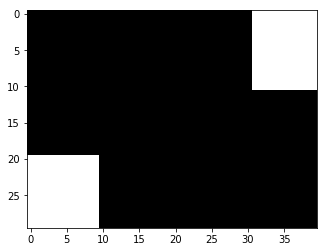

In [27]:
pictures  = extract_pictures(X)
pictures = filter_invalid_picures(pictures)

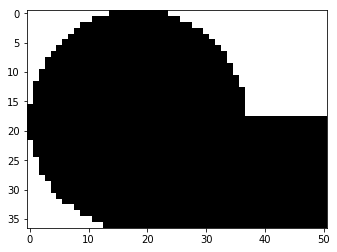

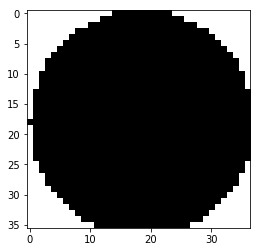

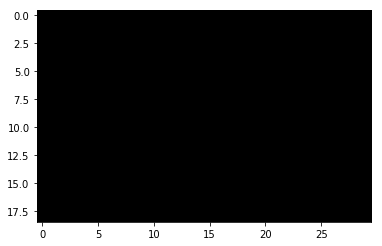

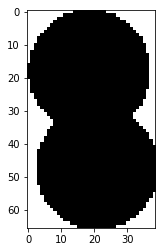

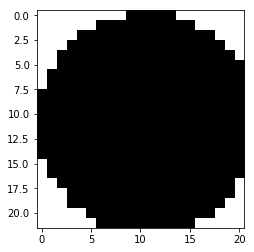

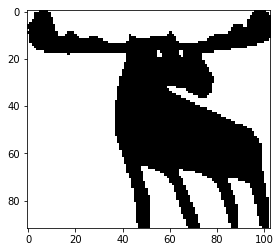

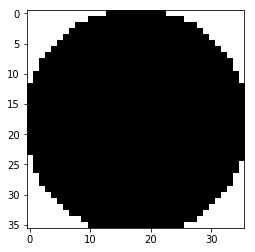

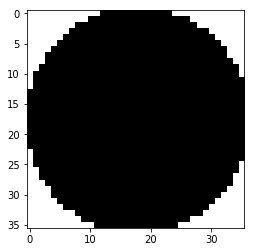

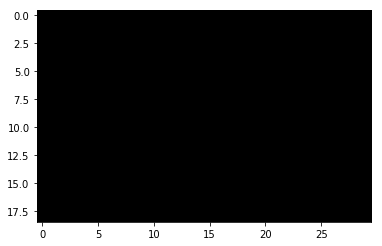

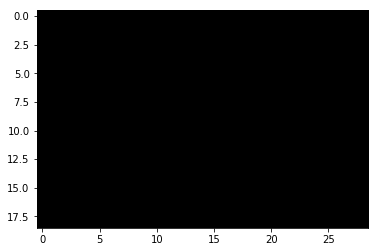

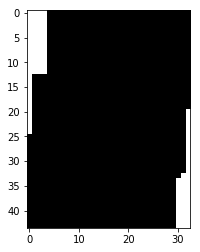

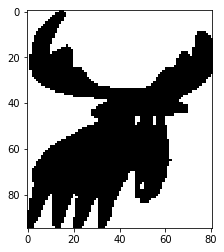

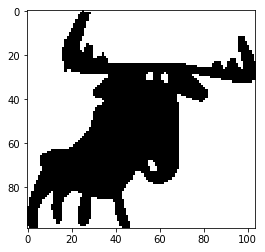

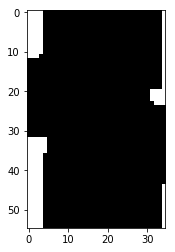

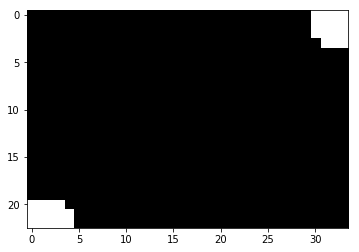

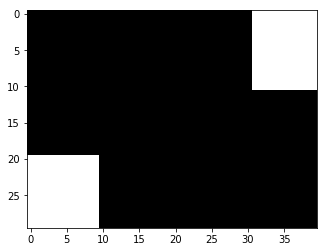

In [28]:
for picture in pictures:
    plt.imshow(picture,cmap='gray')
    plt.show()

In [29]:
class Figure():
    
    weight = 0.7
    
    def __init__(self,picture):
        self.X = picture
        self.length = 0
        self.area = 0
        self.dx = None 
        self.dy = None
      #  self.validate_picture()
    
    #TODO: avoid copypast
    def calculate_all_parameters(self):
        Map = [[False for i in range(len(self.X[0]))] for j in range(len(self.X))]
        for i in range(len(self.X)):
            for j in range(len(self.X[i])):
                if(self.X[i][j] == black_pixel and Map[i][j] == False):
                    if(self.dx == None and self.dy == None):
                        self.dx = i
                        self.dy = j
                    self.flood_fill_extraction(Map , i ,j )
                else:
                    Map[i][j] = True
        self.moosenes = int(self.weight*self.area + (1 - self.weight)*self.length)
                    
    def flood_fill_extraction(self,Map,x,y):
        if(valid_point(self.X,x,y) and self.X[x][y] == black_pixel and Map[x][y] == False):
            Map[x][y] = True
            self.flood_fill_extraction(Map , x+1,y)
            self.flood_fill_extraction(Map , x-1,y)
            self.flood_fill_extraction(Map ,x, y+1)
            self.flood_fill_extraction(Map ,x, y-1)
            self.area = self.area + 1
            if(self.is_bound_pixel(x,y)):
                self.length = self.length + 1
    
    def is_bound_pixel(self,x,y):
        
        if not valid_point(self.X,x,y):
            return True
            
        for i in range(-1,2):
            for j in range(-1,2):
                if(not valid_point(self.X,x + i,y + j)):
                    return True
                if(self.X[x + i][y + j] == white_pixel):
                    return True
        return False
    
   # def validate_picture():
        
                
        
    

In [30]:
figures = list(map(lambda x: Figure(x) ,pictures))

In [31]:
for figure in figures : figure.calculate_all_parameters()

In [32]:
figures = sorted(figures, key = lambda x: x.moosenes)

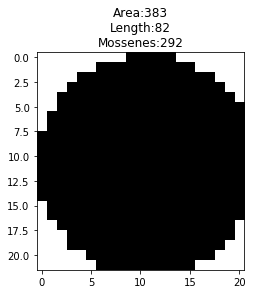

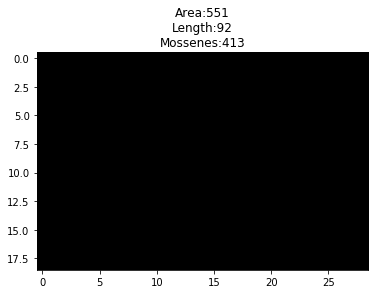

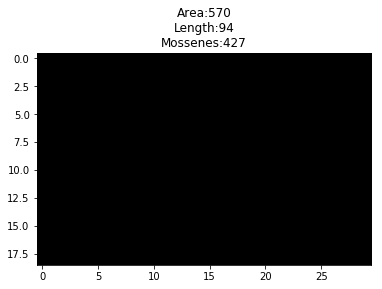

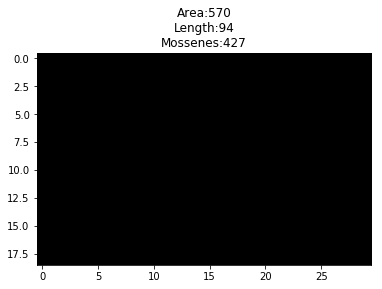

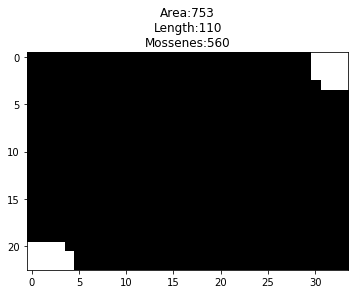

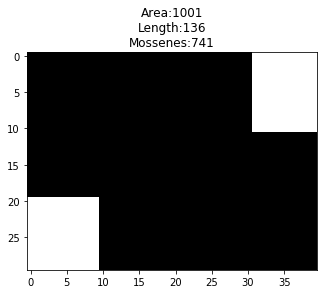

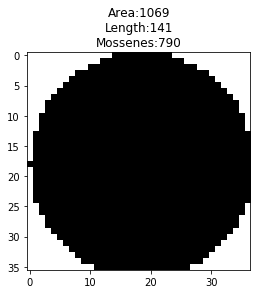

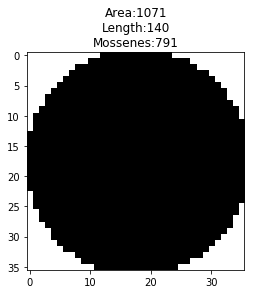

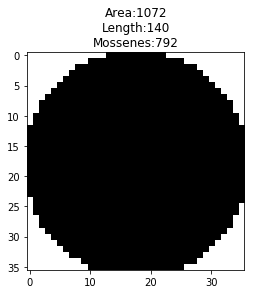

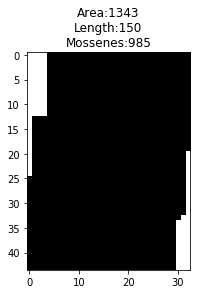

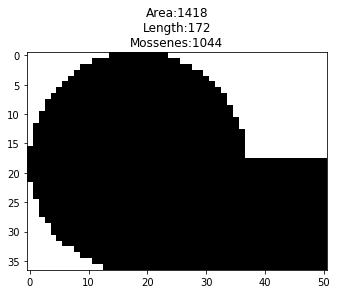

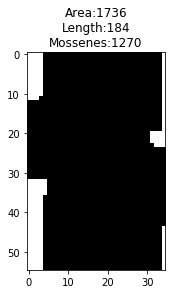

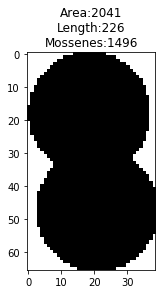

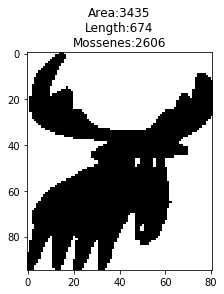

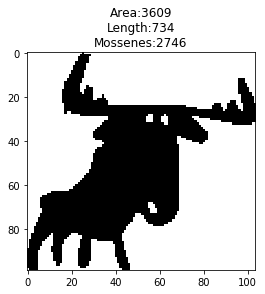

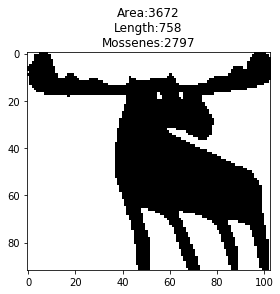

In [33]:
for figure in figures:
    title = "Area:{}\nLength:{}\nMossenes:{}".format(figure.area, figure.length, figure.moosenes)
    plt.imshow(figure.X,cmap='gray')
    plt.title(title)
    plt.show()

In [34]:
def filter_moose(figures):
    max_dev = 0
    pointer = 0
    for i in range(len(figures) - 1):
        diff  = figures[i + 1].moosenes - figures[i].moosenes
        if(diff > max_dev):
            max_dev = diff
            pointer = i + 1
    return figures[pointer:]
            
        
        

In [35]:
mooses = filter_moose(figures)

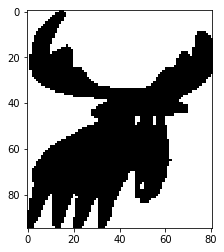

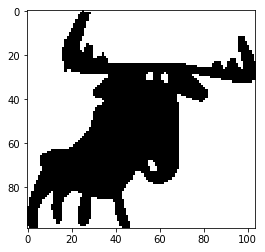

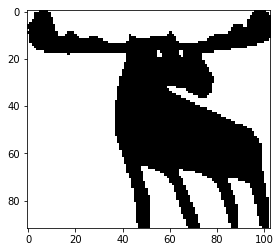

In [36]:
for moose in mooses:
    plt.imshow(moose.X,cmap='gray')
    plt.show()

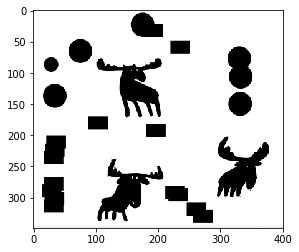

In [37]:
img = read_img(filename)
plt.imshow(img,cmap='gray')
plt.show()